In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys
from procedure import *

#save_datapath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/"
#plotpath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/"


/home1/07428/binod/anaconda3/lib/python3.8/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

start at: 2022-03-31 00:40:36.105468
end at: 2022-03-31 00:40:36.107871


In [2]:
!pwd

/work2/07428/binod/stampede2/resonance_sweeping_low_res_sims


In [21]:
snapshot=200
snaparr = loadwholesnap(path,snapshot)
idd=snaparr['idd']
x=snaparr['x']
y=snaparr['y']
z=snaparr['z']
vx=snaparr['vx']
vy=snaparr['vy']
vz=snaparr['vz']  
mass=snaparr['mass']  #note mass here is in solar mass (use the factor 2.324876e9)

vr=snaparr['vr']
vphi=snaparr['vphi']
vzz=snaparr['vzz']
r=snaparr['r']
phi=snaparr['phi']
zz=snaparr['zz']





In [22]:
print(r)

[412.26166 329.78055 331.52246 ... 361.28638 382.32977 390.98648]


In [23]:
#print((x**2+y**2)**(1/2))
print(np.max(phi))

3.1415918


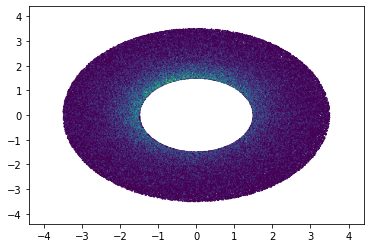

In [28]:
discindx=(mass<5000)
barsample=(r>1.5)*(r<3.5)*discindx
x_b=x[barsample]
y_b=y[barsample]
plt.hexbin(x_b,y_b,gridsize=400,extent=((-4,4,-4,4)),mincnt=1)

In [29]:
#calculating bar_angle
#discindx=(mass<5000)
#barsample=(r>1.5)*(r<4)*discindx
#counts, bins, patches=plt.hist(phi[barsample],bins=360,range=[-np.pi,np.pi])
#plt.xlabel(r"$\phi$ (in radians)")
#plt.ylabel("n")
#plt.title("Snapshot 342")
#plt.savefig("hist_phi.png",bbox_inches="tight",dpi=200)

counts, _ = np.histogram(phi[barsample], bins = np.linspace(-np.pi, np.pi, 360))
        

In [30]:
ff=np.fft.fft(counts-np.mean(counts))
barangle=-np.angle(ff[2])/2.

In [31]:
print(np.rad2deg(barangle))

-6.191535914001575
